In [1]:
%%html
<style>
.container { width:80% !important; }
</style>

In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline
import os
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [10]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation, TimeDistributedDense
from keras.layers.recurrent import LSTM

In [31]:
in_out_neurons = 2  
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(input_dim=in_out_neurons, output_dim=hidden_neurons, return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")  

In [17]:
import pandas as pd  
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise  

In [19]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

In [20]:
(X_train, y_train), (X_test, y_test) = train_test_split(data)  # retrieve data

/opt/conda/lib/python2.7/site-packages/pandas/core/index.py:687: FutureWarning: slice indexers when using iloc should be integers and not floating point
  "and not floating point",FutureWarning)


In [32]:
X_train.shape, y_train.shape, X_test.shape

((16091, 100, 2), (16091, 2), (1699, 100, 2))

[ 2.99256     3.59107199]


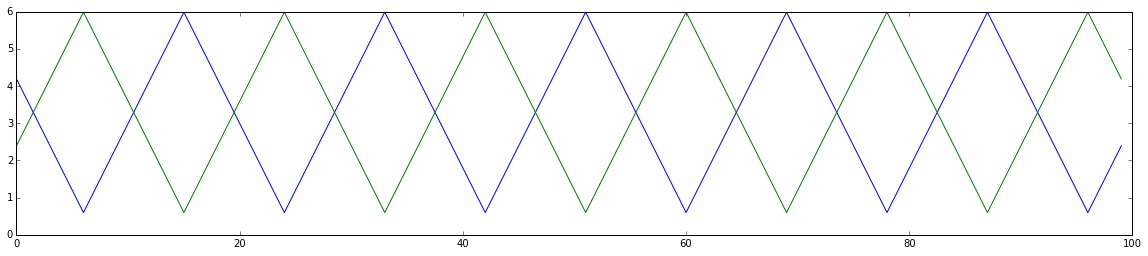

In [30]:
plt.figure(figsize=(20, 4))
ind = 20
plt.plot(X_train[ind])
print y_train[ind]

In [33]:
model.fit(X_train, y_train, batch_size=450, nb_epoch=10, validation_split=0.05)  

Train on 15286 samples, validate on 805 samples
Epoch 1/10
15286/15286 [==============================] - 58s - loss: 0.9963 - val_loss: 0.1727
Epoch 2/10
15286/15286 [==============================] - 61s - loss: 0.1330 - val_loss: 0.2171
Epoch 3/10
15286/15286 [==============================] - 63s - loss: 0.0941 - val_loss: 0.2072
Epoch 4/10
15286/15286 [==============================] - 64s - loss: 0.0715 - val_loss: 0.1029
Epoch 5/10
15286/15286 [==============================] - 59s - loss: 0.0631 - val_loss: 0.0534
Epoch 6/10
15286/15286 [==============================] - 57s - loss: 0.0474 - val_loss: 0.0346
Epoch 7/10
15286/15286 [==============================] - 57s - loss: 0.0439 - val_loss: 0.0684
Epoch 8/10
15286/15286 [==============================] - 58s - loss: 0.0408 - val_loss: 0.0593
Epoch 9/10
15286/15286 [==============================] - 61s - loss: 0.0343 - val_loss: 0.0484
Epoch 10/10
15286/15286 [==============================] - 60s - loss: 0.0309 - val_loss

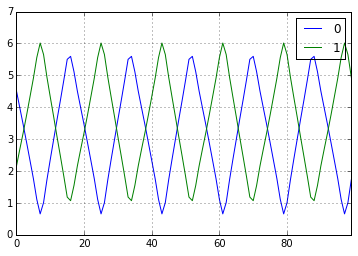

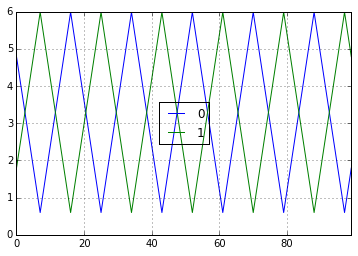

In [34]:
predicted = model.predict(X_test)  
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))

# and maybe plot it
pd.DataFrame(predicted[:100]).plot()  
pd.DataFrame(y_test[:100]).plot()  